# Tata Motors Stock Prediction Project

In [23]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

# ------------------------------- 1. Introduction --------------------------------

In [2]:
# Define the problem statement and objective
print("Problem: Forecasting Tata Motors stock prices to assist in investment decisions.")
print("Objective: Analyze past stock price data and use ARIMA for predictive analytics.")


Problem: Forecasting Tata Motors stock prices to assist in investment decisions.
Objective: Analyze past stock price data and use ARIMA for predictive analytics.


# --------------------------- 2. Dataset Description ----------------------------

In [24]:
# Fetching the dataset
data = yf.download('TATAMOTORS.BO', start='2023-01-01', end='2025-01-01')


[*********************100%***********************]  1 of 1 completed


In [25]:
# Dataset overview
print("\nDataset Description:")
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
print(data.head())



Dataset Description:
Number of rows: 472, Number of columns: 6
Price          Adj Close         Close          High           Low  \
Ticker     TATAMOTORS.BO TATAMOTORS.BO TATAMOTORS.BO TATAMOTORS.BO   
Date                                                                 
2023-01-02    392.369934    394.799988    396.000000    390.750000   
2023-01-03    391.574890    394.000000    398.200012    393.000000   
2023-01-04    383.375671    385.750000    395.149994    385.000000   
2023-01-05    384.617950    387.000000    388.700012    382.549988   
2023-01-06    379.797821    382.149994    388.299988    381.000000   

Price               Open        Volume  
Ticker     TATAMOTORS.BO TATAMOTORS.BO  
Date                                    
2023-01-02    392.000000        867309  
2023-01-03    395.500000        323014  
2023-01-04    395.149994        902928  
2023-01-05    388.399994        854360  
2023-01-06    386.000000        705947  


# 1. Descriptive Analysis (Understanding the Past)

### Objective: Understand the behavior of Tata Motors stock price over the past 2 years.


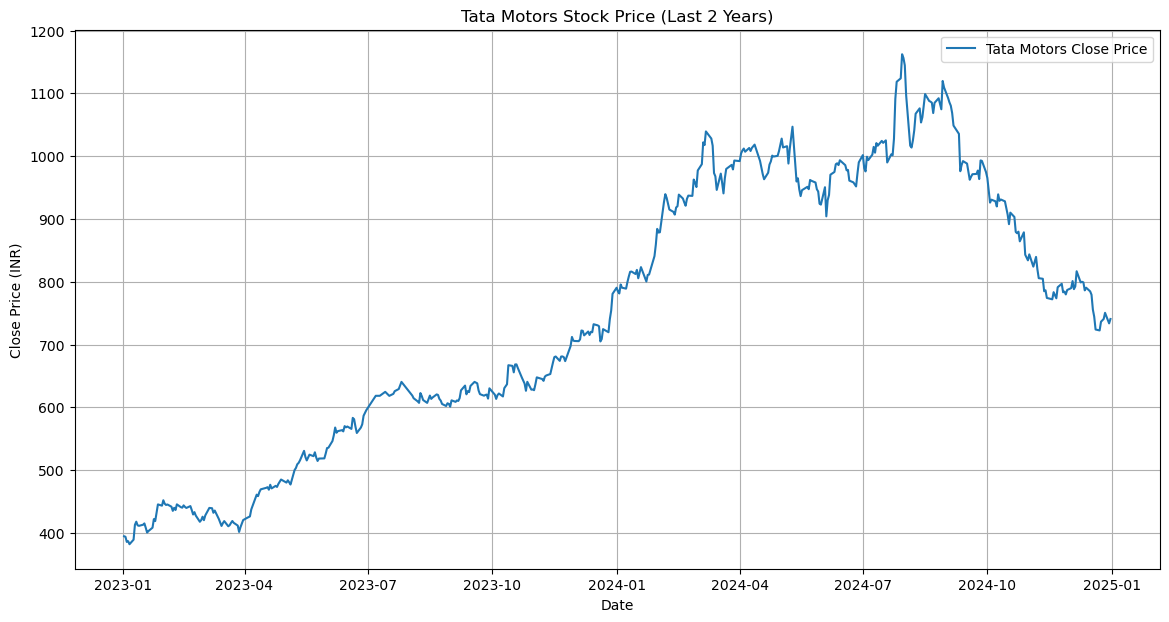

In [26]:
# Visualizing Historical Stock Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Tata Motors Close Price')
plt.title('Tata Motors Stock Price (Last 2 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid()
plt.show()

In [27]:
# Checking for Stationarity using Augmented Dickey-Fuller Test
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.6418896638092138
p-value: 0.46127355990615837


In [30]:
# If p-value > 0.05, the series is non-stationary and may need differencing

# Differencing to make the series stationary
data_diff = data['Close'].diff().dropna()

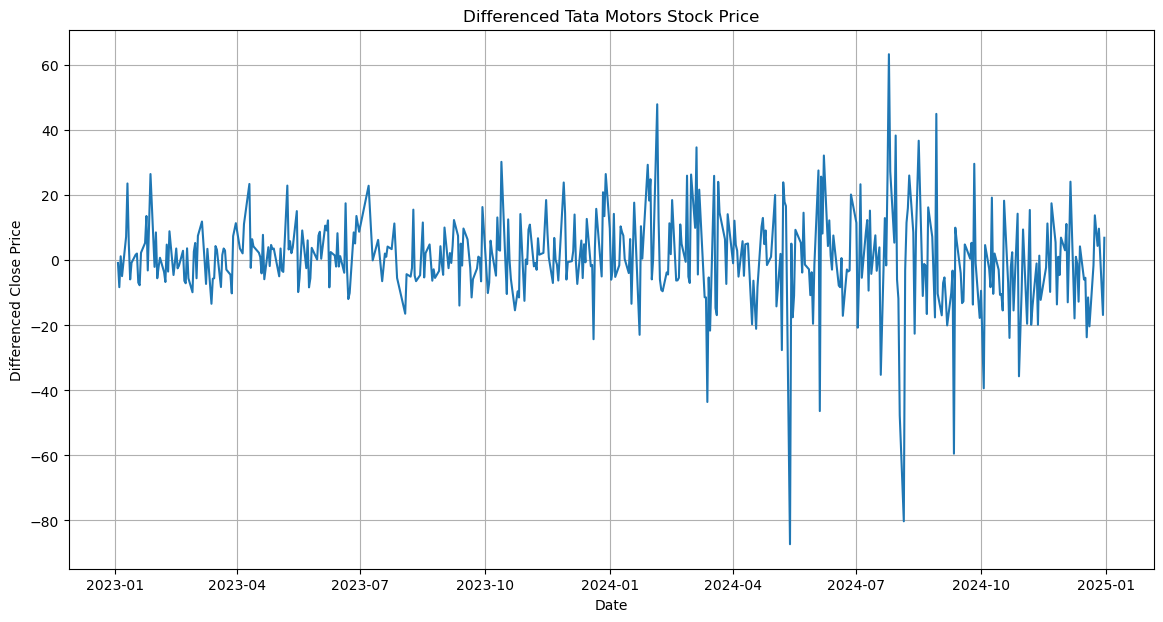

In [32]:
 #Visualizing the Differenced Data
plt.figure(figsize=(14, 7))
plt.plot(data_diff)
plt.title('Differenced Tata Motors Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.grid()
plt.show()


# 2. Predictive Analysis (Forecasting the Future)

### Objective: Forecast the stock prices for the next 30 business days using ARIMA.

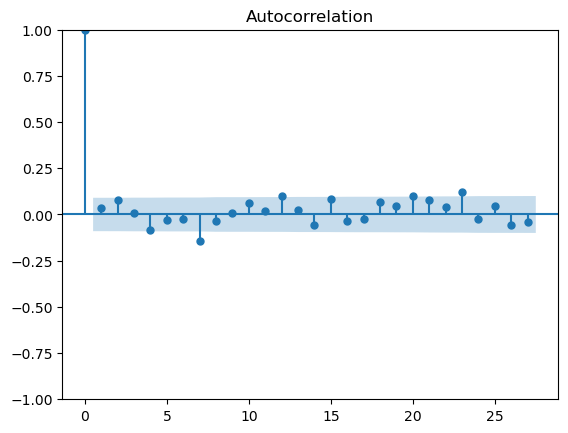

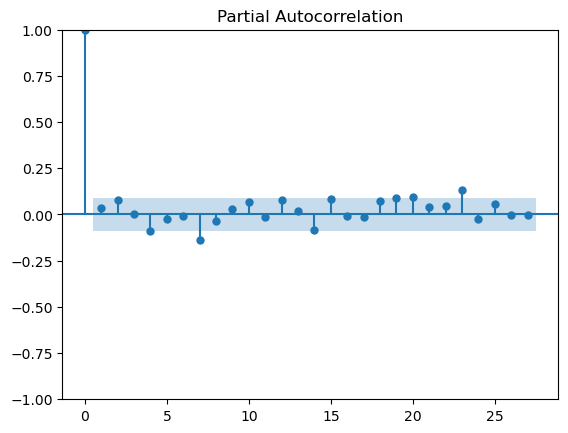

In [33]:
# ACF and PACF plots to determine AR and MA terms
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

In [34]:
# Fit the ARIMA model (example with ARIMA(1, 1, 1), adjust as necessary)
model = sm.tsa.ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          TATAMOTORS.BO   No. Observations:                  472
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1916.274
Date:                Wed, 15 Jan 2025   AIC                           3838.548
Time:                        23:02:14   BIC                           3851.013
Sample:                             0   HQIC                          3843.452
                                - 472                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4471      0.516      0.867      0.386      -0.563       1.458
ma.L1         -0.3937      0.524     -0.752      0.452      -1.420       0.633
sigma2       200.0973      6.468     30.937      0.0

C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# Forecast the next 30 business days
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
# Create a future index for plotting
future_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:]


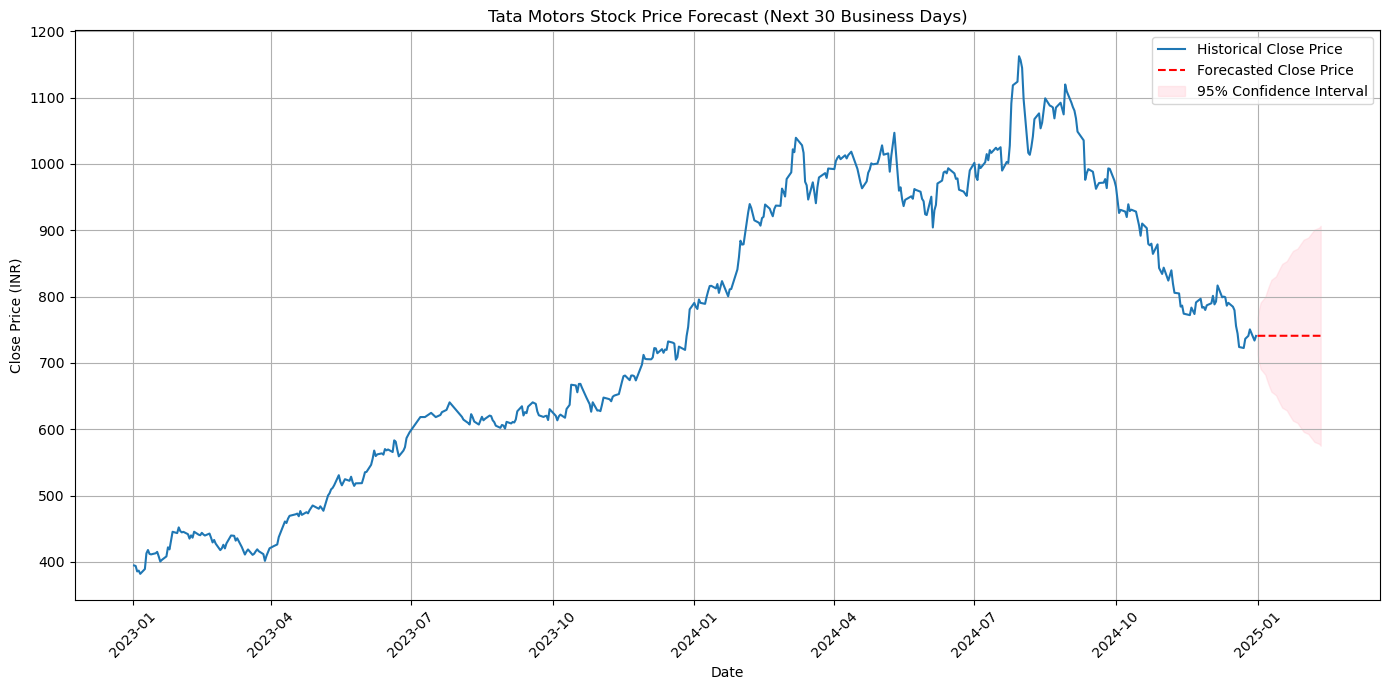

In [37]:
# Plotting Historical and Forecasted Stock Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Price')
plt.plot(future_index, forecast_mean, label='Forecasted Close Price', linestyle='--', color='red')
plt.fill_between(future_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Tata Motors Stock Price Forecast (Next 30 Business Days)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Prescriptive Analysis (Recommending Actions)

### Objective: Provide actionable recommendations based on the forecast for the next 30 business days.

### Prescriptive Insights from the Forecast:
#### - If the forecast indicates upward movement, investors could consider buying or holding.
#### - If the forecast predicts a decline, investors might want to sell or wait for a better entry point.

### Recommending Actions based on Forecast

In [38]:
# Print forecast summary and confidence interval
print("Forecasted Stock Prices for the Next 30 Business Days:")
print(forecast_mean)
print("\n95% Confidence Interval for Forecast:")
print(forecast_conf_int)


Forecasted Stock Prices for the Next 30 Business Days:
472    740.824396
473    740.880004
474    740.904864
475    740.915978
476    740.920946
477    740.923168
478    740.924161
479    740.924605
480    740.924803
481    740.924892
482    740.924932
483    740.924949
484    740.924957
485    740.924961
486    740.924962
487    740.924963
488    740.924963
489    740.924964
490    740.924964
491    740.924964
492    740.924964
493    740.924964
494    740.924964
495    740.924964
496    740.924964
497    740.924964
498    740.924964
499    740.924964
500    740.924964
501    740.924964
Name: predicted_mean, dtype: float64

95% Confidence Interval for Forecast:
     lower TATAMOTORS.BO  upper TATAMOTORS.BO
472           713.099578           768.549215
473           700.610867           781.149140
474           690.768713           791.041015
475           682.405944           799.426011
476           675.033080           806.808813
477           668.379498           813.466838
478    

### Example prescriptive actions based on forecast:
#### - If the forecast mean shows a strong upward trend, advise buying or holding.
#### - If the forecast shows a decline, advise considering risk mitigation or selling.

In [40]:
# Check if the stock price shows a positive or negative trend for the next 30 days
if forecast_mean.iloc[-1] > buy_threshold:
    print("Recommendation: Consider buying or holding Tata Motors stock.")
elif forecast_mean.iloc[-1] < sell_threshold:
    print("Recommendation: Consider selling or holding off on new purchases.")
else:
    print("Recommendation: Monitor the stock closely and reassess in the next few days.")


Recommendation: Consider buying or holding Tata Motors stock.


# 4. Evaluation of Model 

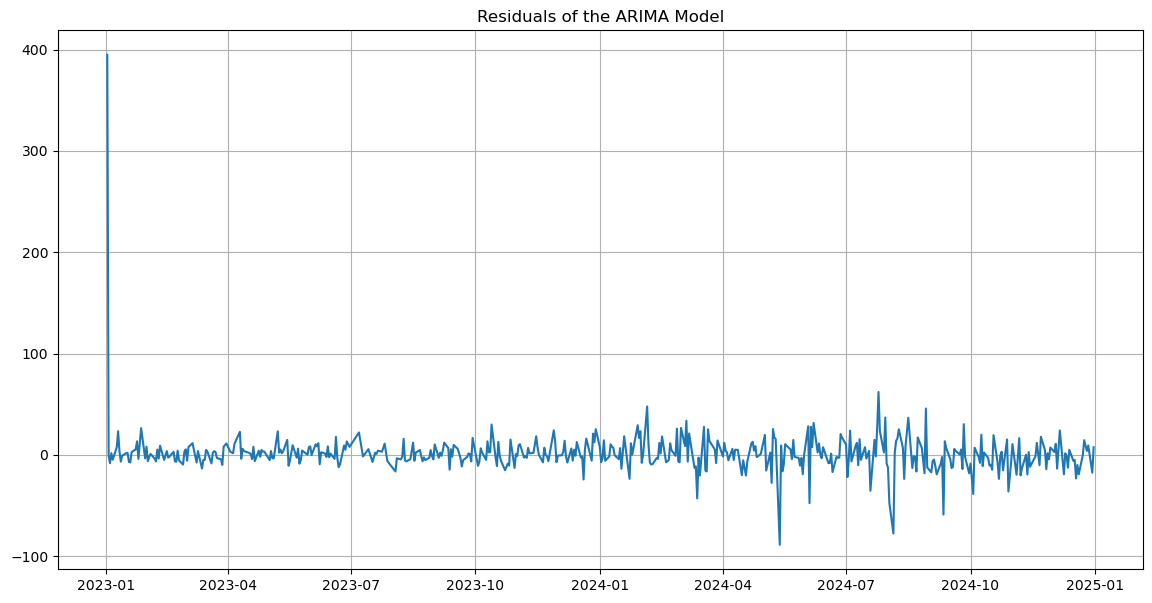

In [42]:
# Residual Plot to check model fitting
plt.figure(figsize=(14, 7))
plt.plot(model_fit.resid)
plt.title('Residuals of the ARIMA Model')
plt.grid(True)
plt.show()